**Importing the usual libraries**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the car_plate.jpg file from the DATA folder**

In [6]:
img = cv2.imread('car_plate.jpg')

**Create a function that displays the image in a larger scale and correct coloring for matplotlib.**

In [7]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

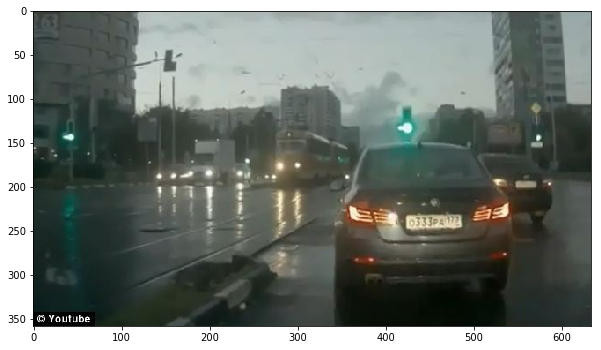

In [8]:
display(img)

**Loading the haarcascade_russian_plate_number.xml file.**

In [9]:
plate_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_russian_plate_number.xml')

**Creating a function that takes in an image and draws a rectangle around and detects the license plate. Andd then drawing a rectangle around it later I had adjusted this function to blur. We have to play with the scaleFactor and minNeighbor numbers to get good results.**

In [14]:
def detect_plate(img):
    
  
    plate_img = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (255,255,0), 4) 
        
    return plate_img
    

In [15]:
result = detect_plate(img)

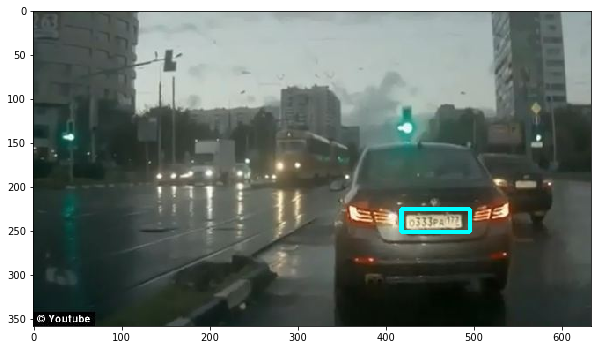

In [16]:
display(result)

**Editing the above function so that it effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps I had taken:**

1. The hardest part is converting the (x,y,w,h) information into the dimension values we need to grab an ROI. We just need to convert the information about the top left corner of the rectangle and width and height, into indexing position values.
2. Once we've grabbed the ROI using the (x,y,w,h) values returned, we'll blur that ROI. I had chosen cv2.medianBlur for this.
3. Now that we have a blurred version of the ROI (the license plate) we will want to paste this blurred image back on to the original image at the same original location. Simply I had used Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

In [17]:
def detect_and_blur_plate(img):
    
    # Watch solutions video for line by line explanation!
    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [18]:
result = detect_and_blur_plate(img)

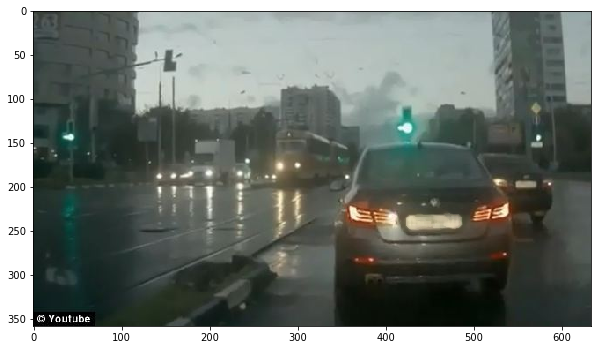

In [19]:
display(result)